In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

TensorFlow version: 2.3.0
Num GPUs Available:  0


In [3]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

In [4]:
languag = "pl"
#languag = "en"

In [5]:
#Data from gesture recognition
T=0.05
N = 20
K = 8

t = np.linspace(start=0, stop=(N-1)*T, num=N)

if languag == "pl":
    g=["pusty", "z dołu do góry", "z góry na dół", "koziołkowanie", "machanie"]
elif languag == "en":
    g=["empty", "from down to up", "from up to down", "dribbling", "wagging"]

d=[
[403,365,444,393,404,364,367,361,374,330,398,386,403,446,394,369,396,397,361,398,389,395,390,403,560,390,394,374,398,331,396,402,426,446,395,402,363,394,389,369,360,366,372,399,397,391,401,333,427,383,402,414,392,446,404,367,392,396,392,428,357,367,452,365,365,399,369,388,394,372,396,446,399,371,390,367,391,406,418,396,439,399,396,367,370,362,369,334,373,363,393,436,370,391,366,368,374,367,331,367,345,339,411,363,372,361,395,343,371,356,366,369,394,338,336,372,335,368,358,403,385,338,371,376,367,391,396,335,366,379,341,370,364,365,345,369,333,365,369,366,396,396,404,387,366,389,345,360,368,415,363,369,333,341,389,365,409,343,371,363,340,377,370,330,366,344,370,368,390,374,387,366,359,340,441,363,397,391,339,388,371,384,367,500,372,370,364,368,371,365,383,363,375,333,372,358,345,414,339,371,394,369,387,401,356,399,413,374,395,359,367,373,365,354,336,375,364,398,358,339,411,364,397,340,369,358,372,360,365,413,373,343,363,368,402,363,326,367,448,336,399,365,372,356,344,343,395,416,364,371,360,338,333,373,386,367,411,376,395,390,342,393,340,328,368,389,367,367,396,368,359,337,375,341,366,366,403,362,363,356,345,441,337,342,340,396,360,367,331,367,438,369,370,364,366,346,341,357,392,401,338,396,366,373,391,341,357,369,416,364,398,366,341,361,372,384,366,397,371,370,361,371,375,340,417,365,344,366,366,359,367,410,370,369,369,371,332,377,355,371,417,372,373,332,368,375,397,365,367,373,389,393,359,371,445,339,395,392,365,359,400,388,395,399,374,367,360,367,343,368,422,336,347,336,395,358,373,390,363,341,337,370,388,371,409,388,474,369,338,364,366,372,397,384,363,369,361,339,392,344,361,395,370,371,445,336,372,365,369,334,369,386,363,436,373,340,365,340,374,340,360,396,417,367,365,397,394,334,367,373,369,382,371,347,365,367,362,347,390,368,329,374,387,365,366,364,367,359,343,360,367,411,346,370,364,341,372,396,330,367,374,367,368,339,374,335,365,355,398,415,363,369,337,364,360,374,357,339,411,372,367,364,368,402,340,356,398,444,392,341,363,344,362,399,346,395,408,363,373,362,369,389,375,332,340,328,347,419,367,342,366,370,361,368,331,340,443,370,371,363,339,370,395,330,368,373,396,340,389,376,361,396,356,370,358,368,370,367,343,362,398,361,339,437,372,343,362,338,371,366,359,307,378,367,370,333,370,364,340,371,339,385,397,400,337,338,367,375,393,367,303,344,410,338,417,377,368,362,365,363,368,356,370,410,392,446,402,368,333,398,373,371,386,364,400,395,385,366,401,393,397,335,371,387,396,369,337,414,366,375,335,369,364,433,361,367,356,377,409,367,415,339,398,363,367,366,395,389,376,358,369,415,374,367,334,340,374,340,358,395,431,338,368,338,369,364,367,338,398,410,393,372,336,370,364,373,388,367,326,374,416,363,344,319,371,364,365,392,369,356,371,420,366,400,373,398,360,371,370,338,414,336,374,395,369,364,343,357,364,443,367,367,336,368,362,335,358,372,391,338,372,401,372,358,340,403,394,445,394,403,393,370,336,370,331,367,369,367,372,368,369,363,367,357,372,380,367,419,372,398,336,371,391,370,354,368,416,366,425,373,370,334,370,374,369,415,368,376,363,369,390,371,357,370,355,369,419,387,400,367,368,359,402,356,366,416,374,399,363,337,377,366,388,367,347,368,416,363,372,364,367,370,339,332,369,371,368,387,365,346,339,400,393,402,362,396,359,375,355,339,382,371,366,333,405,395,336,361,345,359,339,412,372,391,362,372,376,368,360,371,334,365,409,392,421,364,367,346,344,362,370,430,368,416,338,374,390,393,360,374,358,369,445,336,368,364,339,361,367,357,371,419,367,367,347,364,358,369,375,338,367,366,369,362,396,357,371,410,370,366,337,372,367,373,333,370,353,344,445,338,366,372,337,332,368,316,366,411,366,371,364,397,365,371,359,364,369,362,418,366],
[159,184,149,130,160,154,156,172,185,158,151,155,133,157,155,179,162,172,152,157,152,491,2811,2889,3011,3028,3047,3061,3063,3038,2903,2505,2240,2038,1851,1575,1442,1350,1273,1222,1206,1214,1202,1220,1214,1241,1246,1293,1244,1247,1249,1243,1297,1250,233,152,155,225,161,156,151,182,162,129,155,147,187,200,179,183,149,156,201,155,182,147,185,160,181,1939,2727,2872,2921,2880,2911,2950,2940,2960,2832,2522,2336,2148,1962,1712,1599,1471,1396,1291,1270,1266,1284,1279,1321,1301,1313,1289,1297,1349,1309,1305,1292,1304,1280,1267,336,175,164,231,178,157,149,128,203,186,184,144,155,162,129,155,145,163,184,179,156,161,152,156,174,160,205,425,2866,2824,2837,2841,2849,2891,2889,2906,2939,2928,2920,2787,2383,2143,1901,1734,1451,1329,1211,1116,1039,1091,1043,1043,1050,1061,1121,1070,1076,1032,1038,1067,178,157,120,160,158,152,181,186,153,183,149,163,228,152,154,186,155,204,153,137,145,155,157,1096,2866,2788,2801,2911,2932,2935,2943,2804,2650,2401,1984,1853,1615,1511,1284,1182,1183,1060,1042,990,999,1002,1034,1039,1017,1032,1041,1059,1032,178,155,155,149,188,204,178,155,188,155,231,151,162,147,182,204,162,156,147,157,134,150,183,237,2904,2890,2877,2869,2819,2770,2720,2340,2115,1906,1764,1488,1344,1239,1171,1046,972,904,879,907,877,881,901,947,998,966,1034,868,230,155,134,184,194,153,188,175,155,201,188,156,149,154,188,181,156,148,185,154,151,155,2881,3073,3200,3094,3059,3046,3085,2943,2684,2412,2068,1614,1452,1297,1216,1105,1035,1049,1028,1011,982,1033,1044,1036,1042,1078,1039,262,175,155,186,154,183,149,187,234,154,132,161,154,156,149,162,143,153,180,155,157,224,128,296,2907,2804,2845,2904,2918,2826,2411,2264,1970,1793,1480,1389,1273,1231,1190,1160,1187,1185,1181,1187,1176,1033,157,152,156,156,131,157,151,158,226,153,128,162,152,199,180,163,150,155,199,187,185,173,155,2027,2894,2965,2949,2988,2998,2961,2889,2498,2276,2063,1667,1501,1340,1248,1104,1031,1035,1046,1006,996,1031,1035,1080,1062,706,169,160,159,153,184,121,152,155,160,159,170,181,160,152,156,195,161,184,148,181,162,2399,2479,2426,2473,2574,2564,2540,2305,2144,2015,1794,1516,1375,1300,1158,1121,1096,1082,1072,1069,1090,1100,1160,1122,427,148,163,226,153,130,179,153,202,152,185,145,153,162,179,182,170,161,160,123,155,136,921,2652,2662,2823,2870,2897,2891,2581,2343,2101,1850,1534,1440,1293,1216,1140,1127,1220,1162,1219,1199,1240,156,176,154,200,160,156,149,130,161,128,156,145,188,180,149,181,187,152,152,157,158,155,2203,2751,3021,2982,3023,2966,2830,2622,2358,1892,1798,1556,1418,1248,1185,1158,1152,1167,1216,1181,1119,170,152,183,183,132,231,180,159,147,182,157,186,157,227,179,161,148,181,155,190,154,198,155,3053,2971,2984,3096,3054,3007,2875,2670,2183,1899,1743,1420,1296,1242,1172,1110,1156,1092,1090,1111,1102,395,148,161,204,179,156,151,155,157,175,158,200,153,160,148,183,155,136,155,196,154,185,148,183,492,2983,2967,3028,3013,3074,2985,2752,2489,1822,1619,1409,1294,1104,1026,1007,973,975,1002,987,1041,1119,1063,397,159,156,229,151,161,172,154,231,189,155,145,156,187,152,155,158,154,155,150,187,201,180,2502,2846,2909,3065,3085,3023,2837,2618,2436,1915,1728,1587,1511,1459,1357,1357,1346,1362,1424,1355,1367,1319,1236,281,186,183,171,155,161,180,183,145,189,130,177,155,163,154,180,149,186,146,154,180,181,155,145,783,3051,3027,3063,3175,3165,3111,2976,2490,2243,2067,1918,1596,1483,1406,1353,1396,1320,1339,1318,1355,1391,1295,1310,146,182,200,162,186,176,156,158,153,130,175,190,206,178,181,187,154,230,153,160,148,154,157,2599,2918,2970,3043,3018,2829,2651,2229,2005,1882,1680,1491,1375,1361,1403,1337,1332,1312,1331,1315,1264,229,147,158,207,153,184,199,129,230,160,160,124,156,160,180,158,150,160,227,127,154,163,153,306,2759,2910,2925,2997,3048,3028,2909,2693,2437,1960,1791,1675,1425,1367,1314,1332,1308,1330,1330,1316,590,203,151,157,149,155,199,182,160,177,182,160,185,156,176,160,149,154,158,159,158,146,181,163,153,2242,2712,2897,3015,2991,2997,2772,2618,2419,2233,1804,1640,1484,1276,1179,1162,1089,1072,1131,1092,1131,1158,825,168,155,187,153,180,146,156,184,150,156,197,129,155,186,156,146,180,163,180,181,148,187,186,151,158,3051,2927,2920,2938,2996,2972,2941,2812,2368,2155,1898,1767,1450,1319,1247,1159,1120,1183,1095,1133,1150,1187,1260,158,157,152,154,158,155,156,178,185,172,155,156,152,182,145,159,133,153,184,190,182,2554,2684,2751,2805,2881,2942,2847,2719,2546,2379,2043,1815,1655,1500,1268,1275,1146,1127,1122,1123,1180,1167,1130,1092,259,187,154,156,178,160,199,180,156,135,158,146,155,160,154,184,157,154,182,151,134,151,154,178,134,158,150,156,163,153,156,176,161,205,128,158,154,155,174,151,184,176,154,184,156,156,173,159,204,151,183,160,182,202,181,161,174,155,197,160,131,175,155,201,129,155,157,132,171,178,158,152,158,146,188,205,153,153,160,180,202,180,162,176],
[164,182,224,153,159,177,184,158,156,158,150,160,174,182,157,157,158,174,180,157,129,156,150,161,202,207,157,154,181,122,180,158,152,156,160,185,230,178,186,178,181,223,160,155,153,155,160,156,232,152,135,147,153,197,157,154,150,187,197,153,157,161,157,148,157,160,179,157,123,162,159,151,158,162,152,183,126,185,144,129,156,152,158,171,159,186,126,157,188,155,156,153,188,200,181,157,161,129,145,153,163,125,155,123,185,201,180,133,125,155,197,271,1260,1268,1297,1347,1304,1304,1305,1336,1350,1394,1477,1493,1509,1588,1715,2099,2237,2427,2656,2934,2966,3014,3017,3022,3018,3002,3047,3071,2979,2943,2845,121,80,154,162,128,131,152,160,229,180,183,152,182,170,160,185,177,158,160,156,184,152,104,173,1262,1511,1653,1743,1754,1762,1851,1794,1802,1785,1921,2058,2208,2434,2905,3048,3097,3123,3171,3108,3141,3017,2859,66,155,188,150,155,174,161,158,152,157,175,154,232,158,182,149,155,161,153,131,149,160,206,178,131,74,599,1427,1363,1404,1348,1359,1409,1396,1420,1449,1539,1763,1912,2144,2353,2746,2867,2964,2973,2927,2931,2930,2977,2985,1201,52,190,183,196,155,162,179,155,146,158,131,177,157,146,154,203,160,158,124,156,161,154,131,50,1542,1619,1655,1682,1693,1688,1700,1741,1935,2087,2266,2433,2816,2989,2986,3017,2946,2975,2919,2946,2938,2911,2940,3032,1470,87,156,190,147,155,203,133,184,149,155,231,152,155,136,157,195,155,160,152,184,148,104,837,878,972,1077,1103,1149,1116,1227,1293,1395,1495,1826,2069,2223,2429,2762,2887,2891,2824,2737,2703,2715,2677,2658,2681,2649,2532,2384,2370,372,185,155,204,154,157,174,155,156,155,155,150,158,205,181,183,137,158,196,179,163,177,157,96,910,974,1002,1041,1098,1125,1162,1237,1456,1551,1739,1947,2424,2654,2855,3050,3127,3088,3066,3024,2962,2982,2908,2842,2797,2717,2632,1955,55,148,157,227,155,129,185,155,196,155,133,152,154,149,163,156,153,154,187,156,125,428,1024,1058,1093,1085,1096,1125,1151,1217,1384,1513,1759,1861,2293,2447,2650,2920,2956,2965,2932,2867,2795,2815,2835,2757,2721,2684,2543,2261,1919,80,151,187,197,180,187,152,156,179,162,159,151,155,161,181,157,151,162,146,157,148,874,884,897,944,1004,1035,1101,1188,1391,1598,1682,1890,2305,2399,2519,2470,2409,2363,2314,2265,2152,2034,1199,156,148,153,156,155,155,150,152,188,129,185,186,207,233,152,187,148,181,232,159,160,97,84,867,912,938,966,1006,1053,1037,1033,1092,1155,1236,1332,1600,1771,1947,2313,2426,2576,2643,2734,2699,2723,2775,2635,2600,2525,2520,2343,2144,1354,76,160,198,128,157,154,155,145,160,132,152,155,162,155,156,153,161,122,157,157,162,156,158,180,106,395,1124,1146,1276,1263,1261,1246,1284,1334,1396,1577,1689,1879,2004,2397,2515,2698,2855,2892,2858,2848,2856,2728,2586,2539,2228,183,146,181,157,157,155,146,161,185,150,157,161,156,205,179,161,149,182,202,188,158,173,131,440,980,1004,1054,1163,1144,1177,1187,1290,1389,1575,1810,1991,2144,2377,2704,2835,2932,3002,3083,3120,3064,3042,2952,2853,2753,2639,2290,817,104,157,183,158,150,159,197,130,155,187,155,196,128,190,150,157,219,189,157,149,130,111,634,945,1036,1075,1131,1096,1130,1262,1351,1538,1782,1940,2105,2284,2630,2770,2889,2915,3052,3101,3003,2990,2848,2715,2711,2512,103,150,155,156,153,154,151,158,232,129,156,162,182,203,153,162,145,182,159,163,155,144,152,136,151,102,57,1168,1218,1245,1283,1288,1338,1360,1490,1573,1639,1802,2147,2343,2502,2662,2845,2914,2852,2835,2792,2752,2704,2728,2683,2592,2577,2623,163,234,153,160,124,158,206,163,156,147,180,161,154,182,151,163,203,178,157,156,156,196,128,158,151,102,160,981,1002,1029,1074,1084,1124,1239,1396,1538,1702,1913,2394,2642,2863,2978,3034,3045,2932,2887,2767,2776,1891,51,158,151,154,158,184,156,178,159,147,182,204,160,158,148,183,162,152,158,201,159,203,154,182,153,183,193,159,1226,1323,1326,1422,1447,1516,1590,1839,2057,2147,2347,2746,2894,2946,3015,3051,3007,2988,2957,2892,2895,2933,68,147,180,183,160,182,148,155,186,178,183,148,189,183,176,183,163,154,207,180,134,148,154,156,154,158,98,679,937,943,1000,1106,1187,1296,1425,1725,1905,2114,2326,2730,2944,2985,3013,3063,3031,3053,2991,2885,2693,2566,96,99,158,150,160,124,154,156,187,155,146,154,160,128,183,175,160,156,179,155,150,153,201,158,156,80,348,1167,1158,1162,1149,1251,1386,1414,1549,1806,1971,2131,2344,2741,2859,2914,2946,2990,2970,2956,2935,2826,2806,2883,67,157,149,155,162,182,131,151,163,196,129,160,159,182,124,154,185,152,184,174,182,231,152,85,513,1032,1118,1155,1212,1241,1308,1495,1593,1766,1926,2402,2620,2813,2989,3166,3205,3197,3009,2651,1640,78,158,183,129,177,160,224,155,157,160,156,174,155,163,152,183,145,189,184,150,157,201,179,155,126,103,122,374,720,909,971,1029,1225,1332,1444,1631,2013,2194,2376,2502,2703,2734,2715,2767,2658,2616,2613,2625,80,154,204,159,158,147,182,160,154,157,177,159,197,157,183,192,184,172,183,163,153,155,151,156,1100,1127,1275,1387,1420,1399,1487,1625,1704,1827,2211,2377,2587,2737,2966,3025,3091,3075,3084,3149,3061,3035,2701,2529,1283,76,186,154,182,159,184,227,156,162,178,183,144,162,160,179,157,160,182,202,128,137,127,156,197,156,186,177,184,176,156,158,160,182,174,152,187,155,156,148,163,175,154,155,160,130,147,183,158,179,156,157,157,228,153,161,149,182,198,160,158,149,155,184,180,156,176,163,199,154,184,155,154,174,130,186,126,156,159,154,202,179,160,176,155,198,132,183,149,157,162,152,156,126,163,149],
[369,334,339,341,339,410,393,346,336,314,332,375,327,340,412,374,368,336,367,363,335,357,342,340,337,1069,2249,3223,2799,2269,1482,1056,1810,2426,2978,2329,1480,404,348,385,311,363,311,340,364,317,333,369,384,372,342,333,339,374,339,328,340,371,339,341,361,349,356,1431,2671,2968,2533,2064,1623,353,510,1966,2941,2652,2052,1256,340,367,331,338,373,336,340,336,401,332,363,383,369,343,364,343,333,363,1237,2642,3253,2636,2196,1385,1147,1318,2044,2922,2553,1936,1533,365,359,395,383,393,416,368,402,395,367,389,372,465,394,446,403,371,478,2043,390,393,412,448,1936,2003,2282,2675,347,384,395,399,397,367,392,372,423,426,385,398,446,395,399,402,392,390,396,359,452,471,390,981,2339,2959,3250,2219,1723,871,399,424,1245,2195,2783,2398,1653,434,429,383,364,470,368,371,363,396,391,396,383,401,443,395,426,401,397,392,398,683,2044,2939,2983,2223,1735,1241,356,401,726,2068,2705,2309,1645,466,398,393,369,390,402,383,393,407,400,371,394,395,435,397,383,423,416,361,425,424,2408,3116,3295,2053,1591,861,386,519,1593,2510,3162,2289,1635,499,411,402,367,391,421,420,423,381,397,443,391,367,375,371,360,425,429,394,447,395,2123,525,3058,2821,1646,514,362,543,2458,3121,2787,2009,347,395,445,401,402,391,423,374,368,408,366,399,391,396,389,404,359,394,418,1666,2413,2636,2625,2400,2062,1581,422,422,397,851,2540,2622,2412,1731,393,395,418,365,373,361,396,387,372,472,390,399,368,367,425,429,381,394,530,2647,2811,2659,2304,1601,992,638,476,2113,2902,3309,2687,345,383,396,401,395,426,361,374,391,428,385,374,386,363,369,377,397,387,397,1253,1800,2463,3015,2755,2192,1797,1477,501,588,1172,2486,2882,3191,2351,350,437,393,444,401,399,364,396,368,367,444,451,399,393,396,401,398,385,395,1839,2399,2688,2606,1738,1471,1049,742,1113,1712,2505,3009,2073,755,379,395,449,364,395,398,373,385,365,402,394,398,391,402,360,395,387,407,1351,2169,2777,3007,2299,1900,1679,1583,1853,2482,3209,2537,2099,1450,392,400,356,367,430,363,368,389,404,353,393,442,399,397,420,396,361,394,384,1381,2285,2390,2216,1739,1573,1279,1054,1275,1714,2202,2424,1951,679,391,441,400,395,362,400,385,344,479,370,371,390,398,401,366,462,391,1032,2124,2587,2677,2371,1969,1618,1061,361,367,756,1803,2994,2505,2066,348,399,383,394,373,364,398,390,377,359,369,469,400,371,365,368,393,396,356,974,2831,3217,2942,2342,1324,629,390,640,1549,2342,2675,2149,1556,641,430,374,368,391,427,391,395,361,392,393,366,370,374,400,387,426,400,395,1800,2890,3122,2572,2091,1609,737,520,728,1249,2664,3122,2866,2282,443,336,413,369,396,390,397,400,395,438,425,402,364,395,388,372,467,395,420,395,369,391,1440,2826,2688,2596,2315,1324,661,392,402,1220,2128,2727,2205,1689,444,389,406,414,396,475,395,397,363,427,388,371,385,427,391,392,367,398,396,2051,2757,2738,2287,1816,1263,422,391,425,1211,2539,2478,2221,1173,357,397,416,400,422,397,444,370,368,364,394,402,366,419,366,405,1563,2461,2654,451,447,504,1028,1362,1593,1901,2395,582,476,456,401,428,380,395,399,392,427,392,374,385,365,414,395,370,362,391,359,397,443,397,370,390,425,371,395,383,391,403,392,402,389,374,358,394,415,395,397,391,393,358,426,445,398,368,390,427,397,396,412,335,404,363,397,386,372,466,366,396,395,425,417,367,386,394,445,397,425,389,399,402,394,414,422,398,335,366,388,401,357,396,419,395,396,364,427,387,396,414,369,371,363,397,400,366,386,422,402,365,395,363,372],
[371,371,397,411,338,372,339,399,388,346,412,367,368,374,345,363,368,371,369,372,331,374,361,367,370,395,371,335,372,359,370,384,375,370,367,344,2142,903,120,314,1019,846,2069,374,372,360,368,371,364,345,336,403,360,369,391,375,371,363,372,406,2863,198,1393,1957,245,1935,1258,338,419,338,369,371,342,336,403,388,342,422,347,372,362,370,376,368,420,1955,1774,273,204,363,1370,1965,383,372,367,368,361,374,384,398,398,373,372,392,372,345,398,451,365,348,335,373,332,2275,2933,68,1875,2482,815,1652,367,414,367,400,404,373,362,372,344,398,420,368,376,396,430,359,374,418,392,399,368,2612,2843,121,2400,2368,2377,66,2483,2912,341,378,399,388,367,375,363,366,330,375,419,364,342,336,371,359,344,452,2368,1117,81,523,1109,2443,348,367,366,362,378,359,369,386,341,368,365,369,388,367,419,345,369,362,373,2268,962,2291,1825,202,2452,397,358,376,423,392,400,370,339,360,368,346,337,368,372,343,415,369,374,361,367,358,374,426,394,1967,1421,69,57,342,2538,366,369,366,374,387,370,368,342,368,392,403,331,401,447,350,317,333,371,402,365,410,368,376,365,1582,1562,478,361,43,2794,313,366,361,376,395,338,368,404,369,360,397,344,364,341,388,375,410,368,372,368,371,362,2665,676,1951,641,2614,373,387,398,374,367,368,365,377,362,368,387,407,373,361,399,392,342,416,371,373,393,341,402,398,442,337,1590,989,310,98,349,60,2560,419,380,370,365,398,363,398,384,401,400,365,393,376,400,412,397,345,365,339,358,347,443,396,372,346,370,363,367,477,2620,482,584,612,727,2703,346,367,395,338,374,364,370,415,347,402,393,344,377,400,417,397,378,364,369,371,401,386,339,405,365,371,364,376,673,2630,921,981,1219,1380,1656,257,370,444,397,373,398,372,370,398,420,371,373,365,338,389,375,414,366,342,374,369,361,346,376,339,1224,2205,2098,613,797,2585,2435,141,364,374,386,366,341,400,373,360,341,374,368,342,364,378,413,395,339,368,370,304,371,396,393,344,1787,2227,805,417,1787,1971,2678,261,374,392,365,340,377,372,331,337,458,366,371,337,374,412,400,373,393,371,358,403,344,367,204,2627,1168,2344,1557,2885,1227,335,360,403,400,394,370,334,367,388,400,370,389,370,373,368,370,366,376,391,339,446,375,372,340,372,718,2447,152,231,292,284,371,180,2047,345,394,373,364,398,363,373,387,369,421,345,373,363,395,374,397,372,362,317,363,342,400,400,2418,2903,167,339,398,356,44,2905,1282,364,376,340,385,397,371,365,367,361,344,421,339,372,365,368,357,374,420,368,369,375,369,2367,1947,279,60,99,169,1624,1823,331,370,397,365,329,368,419,341,344,372,373,388,370,348,398,340,369,375,391,371,386,378,451,338,1553,198,316,142,260,279,226,1144,369,371,363,395,346,371,370,365,345,361,341,421,375,402,365,370,391,366,342,365,373,419,370,372,401,373,367,375,362,341,357,407,373,364,342,375,343,386,369,373,367,368,362,345,332,370,373,338,342,335,374,332,370,418,401,399,393,368,378,367,446,394,373,365,371,361,372,414,368,344,341,370,364,343,359,370,416,375,374,365,343,406,343,412,367,375,395,372,365,403,382,369,351,366,369,389,345,364,396,420,377,373,361,426,373,368,419,367,375,366,342]
]

D_MAX = 4096

for i in range(len(d)):
    for j in range(len(d[i])):
        d[i][j] /= D_MAX

start1 = [22, 80, 145, 198, 250, 300, 351, 396, 443, 488, 532, 576, 622, 668, 715, 760, 805, 850, 900, 943]
start2 = [117, 168, 218, 265, 314, 365, 415, 464, 514, 570, 616, 668, 719, 773, 823, 872, 922, 969, 1017, 1063]
start3 = [21, 59, 90, 119, 154, 188, 222, 256, 288, 321, 354, 387, 419, 452, 484, 517, 550, 586, 619, 648]
start4 = [28, 52, 77, 105, 134, 160, 185, 215, 245, 273, 304, 340, 375, 407, 439, 469, 502, 534, 565, 597]

for i in range(len(start1)):
    start1[i] += 3

s = [start1, start2, start3, start4]

data_t = []
label_t = []

data_v = []
label_v = []

for i in range(len(d[0])-N):
    d_tmp = d[0][i:i+N]
    l_tmp = 0
    if i % 10 != 0:
        data_t.append(d_tmp)
        label_t.append(l_tmp)
    else:
        data_v.append(d_tmp)
        label_v.append(l_tmp)

for i in range(len(s)):
    for j in range(len(d[i+1])-N):
        d_tmp = d[i+1][j:j+N]
        l_tmp = 0
        for k in range(len(s[i])):
            if j >= s[i][k]-K and j <= s[i][k]+K:
                l_tmp = i+1
        if j % 10 != 0:
            data_t.append(d_tmp)
            label_t.append(l_tmp)
        else:
            data_v.append(d_tmp)
            label_v.append(l_tmp)

len(data_t), len(label_t), len(data_v), len(label_v)

(4069, 4069, 455, 455)

In [6]:
latent_dim = 1
hidden = 20

class Autoencoder(Model):
  def __init__(self, latent_dim, hidden):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim
    self.hidden = hidden
    self.encoder = tf.keras.Sequential([
      layers.Dense(hidden, activation='relu'),
      layers.Dense(latent_dim),
    ])
    self.decoder = tf.keras.Sequential([
      layers.Dense(hidden, activation='relu'),
      layers.Dense(N, activation='sigmoid'),
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

In [ ]:
autoencoder_1d = Autoencoder(latent_dim, hidden)
autoencoder_1d.compile(optimizer='adam', loss=losses.MeanSquaredError())
autoencoder_1d.fit(data_t, data_t, epochs=1000, shuffle=True, validation_data=(data_v, data_v), verbose=0)
autoencoder_1d.evaluate(np.array(data_t), np.array(data_t), verbose=2)
autoencoder_1d.evaluate(np.array(data_v), np.array(data_v), verbose=2)
autoencoder_1d.save("autoencoder_1d.pb")

In [11]:
autoencoder_1d = tf.keras.models.load_model("autoencoder_1d.pb")

In [62]:
encoded_imgs = autoencoder_1d.encoder(tf.convert_to_tensor(data_v)).numpy()
decoded_imgs = autoencoder_1d.decoder(encoded_imgs).numpy()

outs = [[],[],[],[],[]]
for i in range(len(label_v)):
    outs[label_v[i]].append(encoded_imgs[i])

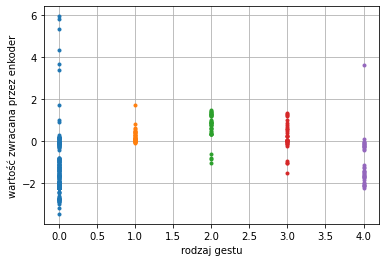

In [63]:
for i in range(len(outs)):
    z = [i]*len(outs[i])
    plt.plot(z, outs[i], '.')
plt.grid()
if languag == "pl":
    plt.xlabel('rodzaj gestu')
    plt.ylabel('wartość zwracana przez enkoder')
elif languag == "en":
    plt.xlabel('gesture type')
    plt.ylabel('value from encoder')

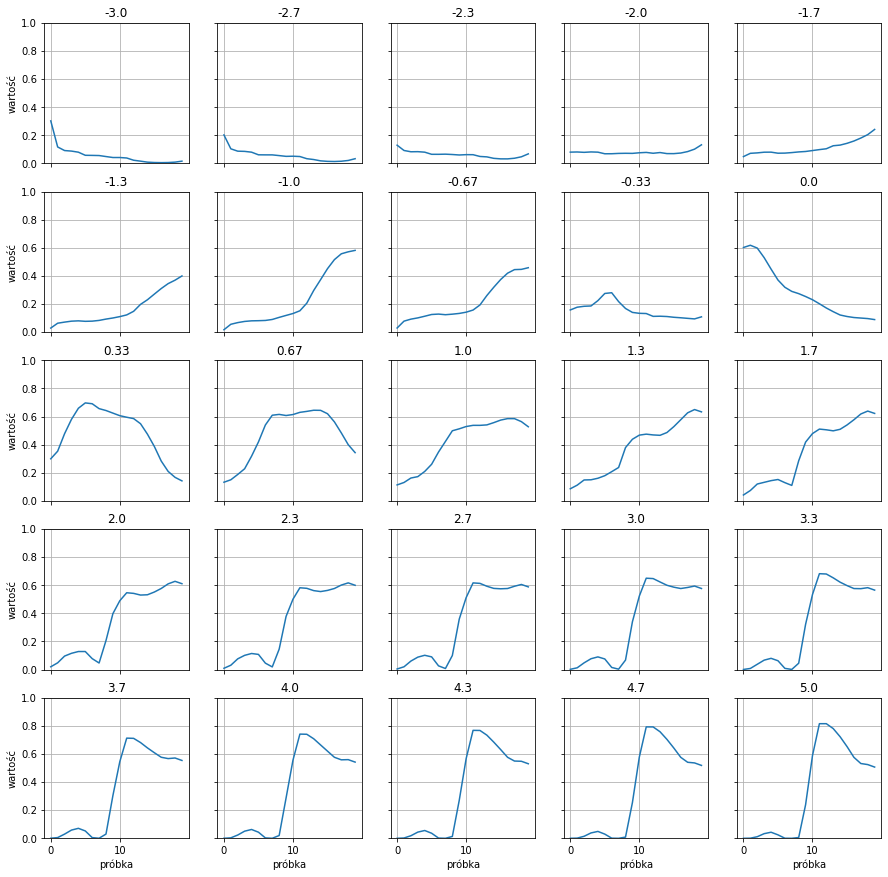

In [73]:
fig = plt.figure(figsize=(15, 15))

v = np.linspace(start=-3, stop=5, num=25)
out = autoencoder_1d.decoder(tf.convert_to_tensor(v)).numpy()

for i in range(len(v)):
    fig.add_subplot(5, 5, i+1)
    plt.plot(out[i])
    plt.grid()
    plt.title("{:.2}".format(v[i]))
    plt.ylim(0,1)
    if i < 20:        
        plt.xticks(color='w')
    if i % 5 != 0:
        plt.yticks(color='w')
        
    if i % 5 == 0:
        if languag == "pl":
            plt.ylabel('wartość')
        elif languag == "en":
            plt.ylabel('value')    
    if i >= 20:    
        if languag == "pl":
            plt.xlabel('próbka')
        elif languag == "en":
            plt.xlabel('sample')

In [15]:
autoencoder_2d = Autoencoder(2, 20)
autoencoder_2d.compile(optimizer='adam', loss=losses.MeanSquaredError())

autoencoder_2d.fit(data_t, data_t, epochs=1000, shuffle=True, validation_data=(data_v, label_v), verbose=0)
autoencoder_2d.evaluate(np.array(data_t), np.array(data_t), verbose=2)
autoencoder_2d.evaluate(np.array(data_v), np.array(label_v), verbose=2)
autoencoder_2d.save("autoencoder_2d.pb")

128/128 - 0s - loss: 0.0058
15/15 - 0s - loss: 1.9442
INFO:tensorflow:Assets written to: autoencoder_2d.pb\assets


In [ ]:
#autoencoder_2d = tf.keras.models.load_model("autoencoder_2d.pb")

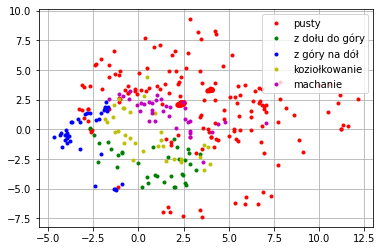

In [56]:
encoded_imgs = autoencoder_2d.encoder(tf.convert_to_tensor(data_v)).numpy()
decoded_imgs = autoencoder_2d.decoder(encoded_imgs).numpy()

outs = [[],[],[],[],[]]
for i in range(len(label_v)):
    outs[label_v[i]].append(encoded_imgs[i])
    
for i in range(len(outs)):
    #z = [i]*len(outs[i])
    #plt.plot(outs[i], '.')
    pass

color = ['r.', 'g.', 'b.', 'y.', 'm.']
for j in range(len(outs)):
    for i in range(len(outs[j])):
        if i==0:
            plt.plot(outs[j][i][0], outs[j][i][1], color[j], label=g[j])
        else:
            plt.plot(outs[j][i][0], outs[j][i][1], color[j])
plt.grid()
plt.legend(loc="upper right", ncol=1)

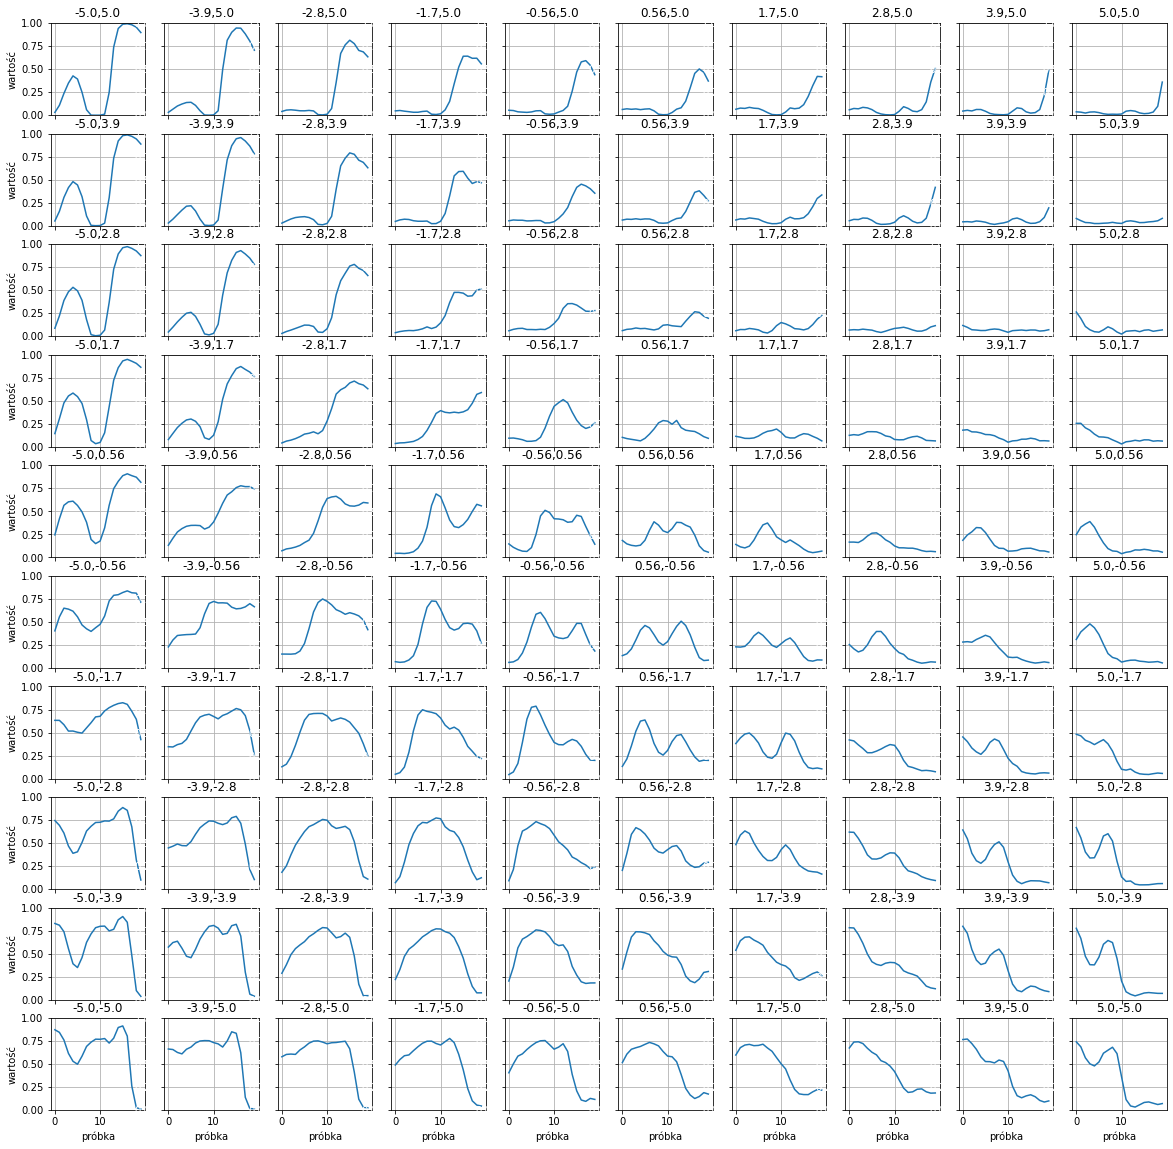

In [80]:
fig = plt.figure(figsize=(20,20))
N=10
x = np.linspace(start=-5, stop=5, num=N)
y = np.linspace(start=-5, stop=5, num=N)

for i in range(len(x)):
    for j in range(len(y)):
        d = [[x[j],y[N-i-1]]]
        o = autoencoder_2d.decoder(tf.convert_to_tensor(d)).numpy()
        fig.add_subplot(N, N, N*i+j+1)
        plt.plot(o[0])
        plt.title("{:.2},{:.2}".format(x[j],y[N-i-1]))
        plt.ylim(0,1)
        plt.grid()
        if i < N-1:        
            plt.xticks(color='w')
        if j != 0:
            plt.yticks(color='w')
        if j == 0:
            if languag == "pl":
                plt.ylabel('wartość')
            elif languag == "en":
                plt.ylabel('value')    
        if i == N-1:    
            if languag == "pl":
                plt.xlabel('próbka')
            elif languag == "en":
                plt.xlabel('sample')